In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

DataSet
https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope

In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df= pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"]= (df["class"] == "g").astype(int)

In [ ]:
df["class"].unique()

array([1, 0])

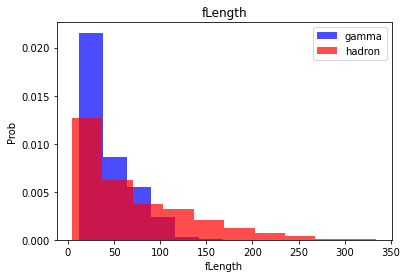

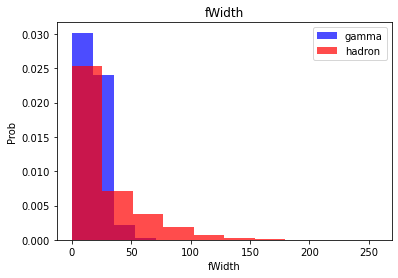

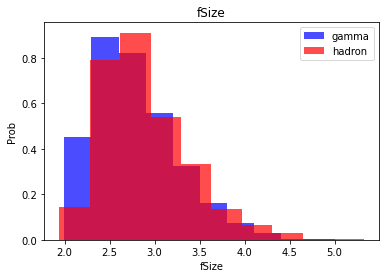

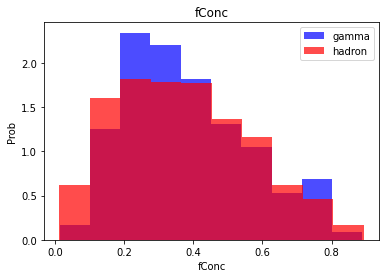

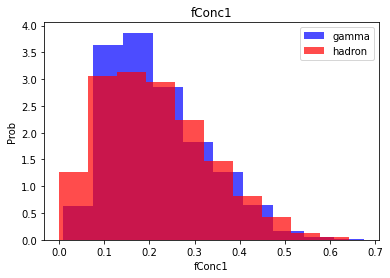

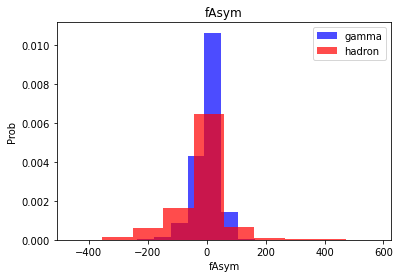

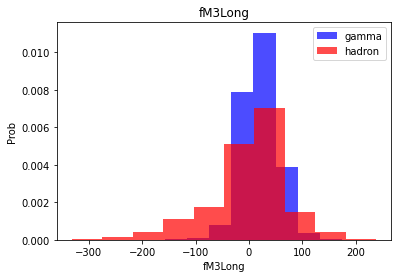

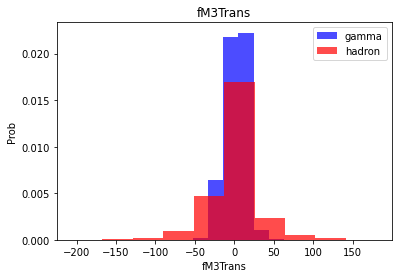

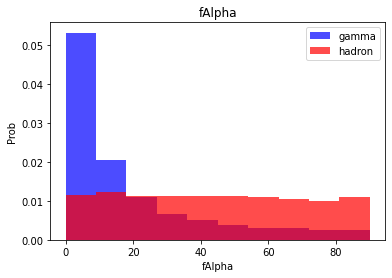

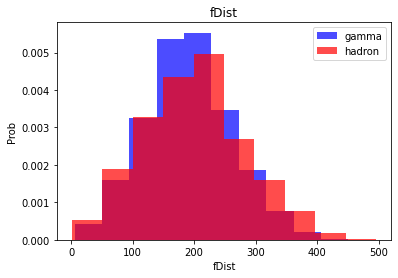

In [13]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Prob")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation and test datasets

In [40]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [41]:
def scale_dataset(dataframe, oversample=False):
  X= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values

  scaler= StandardScaler()
  X= scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y= ros.fit_resample(X,y)


  data= np.hstack((X,np.reshape(y,(-1,1))))

  return data, X, y

In [32]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [34]:
len(y_train)

14860

In [35]:
sum(y_train ==1)

7430

In [36]:
sum(y_train ==0)

7430

In [42]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#kNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred= knn_model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1328
           1       0.86      0.86      0.86      2476

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [49]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])